In [ ]:
"""
Computer Vision
Homework Assignment 1

Author: Chinmay Wyawahare
"""

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

### Convert image to grayscale 

Min intensity = 0
Max intensity = 255


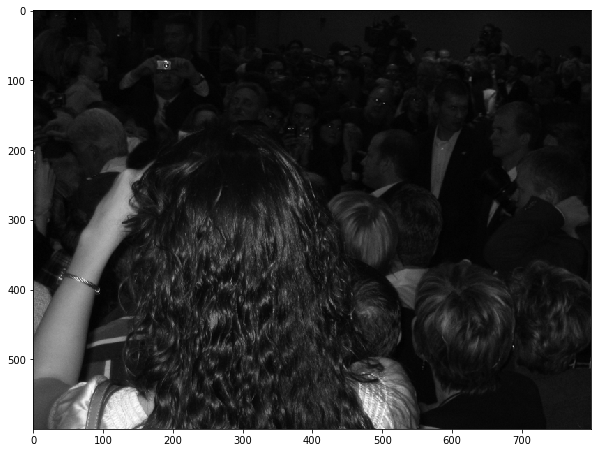

In [2]:
im_path = 'crowd.png'

# Read the image and convert to grayscale
im = io.imread(im_path)
im = rgb2gray(im)

# Convert the image to type uint8 and scale intensity values to the range 0-255
im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')

print("Min intensity = " + str(np.min(im_uint8)))
print("Max intensity = " + str(np.max(im_uint8)))

# Show the original image
fig1 = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(im_uint8)

### Convert image into numpy array

In [3]:
img_np = np.asarray(im_uint8)

### Flatten out img_np array and convert pixels into 1D array

In [4]:
flat_arr = img_np.flatten()

### Plot the histogram

(array([41493., 88254., 76337., 66746., 41468., 30026., 22679., 17645.,
        13371., 11057., 11932.,  5537.,  5515.,  4552.,  4326.,  3293.,
         2586.,  2285.,  2459.,  1609.,  2676.,  1479.,  1688.,  1741.,
         1596.,  1451.,  1555.,  1747.,  2494.,  1602.,  1607.,   888.,
          793.,   553.,   320.,   229.,   213.,   259.,   200.,   252.,
          366.,   239.,   359.,   393.,   498.,   485.,   471.,   366.,
          218.,    92.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

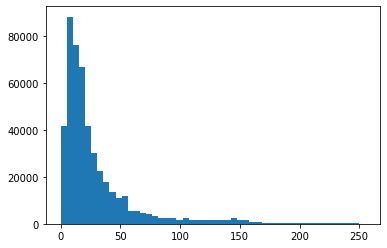

In [5]:
plt.hist(flat_arr, bins=50)

### Probability Distribution Function

In [6]:
def prob_df(image):
    
    # Size of bins
    bins_size = 256
    
    # Define array with the size of bins and initiate it to zeroes
    hist_pdf = np.zeros(bins_size)
    
    pix = 0
    # Iterate through pixels and sum the pixel counts
    for pix in image:
        hist_pdf[pix] += 1
    
    # Return histogram
    return hist_pdf

#### Plot histogram using matplotlib

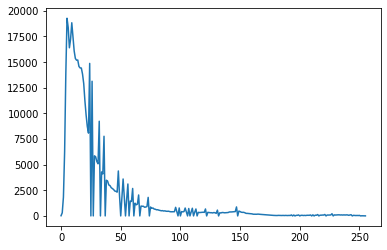

In [7]:
hist = prob_df(flat_arr)

# Visualize using matplotlib
plt.plot(hist)

### Cumulative Distribution Function

In [8]:
def cum_df(his_pdf):
    his_cdf = [his_pdf[0]]
    
    # Iterate over his_pdf values
    for i in his_pdf:
        his_cdf.append(his_cdf[-1] + i)
        
    return np.array(his_cdf)

#### Plot histogram using matplotlib

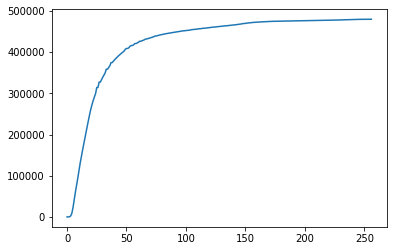

In [9]:
# execute the fn
cdf = cum_df(hist)

# Visualize using matplotlib
plt.plot(cdf)

### Normalize cum_df values to get in the range [0-255]

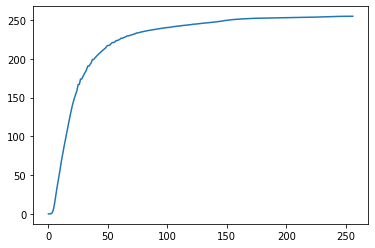

In [10]:
nj = (cdf - cdf.min()) * 255 # Numerator
N = cdf.max() - cdf.min() # Denominator

# Normalized cdf values
norm_cdf = nj / N

# Visualize using matplotlib
plt.plot(norm_cdf)

### Typecast to 'uint8'
#### We can't use float values in images

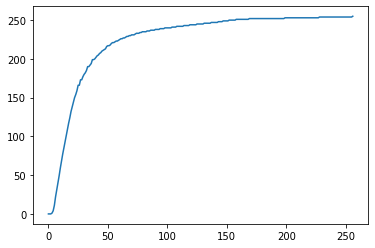

In [11]:
norm_cdf = norm_cdf.astype('uint8')

plt.plot(norm_cdf)

(array([22234.,     0., 19259.,     0., 18358.,     0., 16380., 17234.,
            0., 18820.,     0., 17462.,     0., 16072.,     0., 15340.,
        15172.,     0., 15190., 14563.,     0., 14416.,     0., 14407.,
        13820., 12894.,     0., 11209.,  9830.,  8712.,  8067., 14859.,
        13120.,     0., 11611., 10372.,  9225.,  8377.,  7760.,  9885.,
        10944., 11516.,  7425.,  7928.,  9599.,  8878.,  8970.,  9464.,
         9350., 11278.]),
 array([  0.  ,   5.08,  10.16,  15.24,  20.32,  25.4 ,  30.48,  35.56,
         40.64,  45.72,  50.8 ,  55.88,  60.96,  66.04,  71.12,  76.2 ,
         81.28,  86.36,  91.44,  96.52, 101.6 , 106.68, 111.76, 116.84,
        121.92, 127.  , 132.08, 137.16, 142.24, 147.32, 152.4 , 157.48,
        162.56, 167.64, 172.72, 177.8 , 182.88, 187.96, 193.04, 198.12,
        203.2 , 208.28, 213.36, 218.44, 223.52, 228.6 , 233.68, 238.76,
        243.84, 248.92, 254.  ]),
 <a list of 50 Patch objects>)

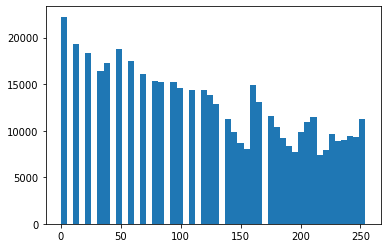

In [12]:
# Fetch values from norm_cdf for every index in flat_arr
img_final = norm_cdf[flat_arr]
img_fin = img_final

# Visualize the result
plt.hist(img_final, bins=50)

### Reshape the array back to original

In [13]:
img_final = np.reshape(img_final, img_np.shape)
img_final

array([[ 77,  85,  85, ...,  77,  85,  93],
       [ 85,  85,  85, ...,  77,  77,  85],
       [ 77,  77,  85, ...,  68,  68,  68],
       ...,
       [223, 225, 225, ..., 109, 109, 109],
       [223, 224, 227, ..., 101,  85, 101],
       [223, 224, 225, ...,  93,  85, 101]], dtype=uint8)

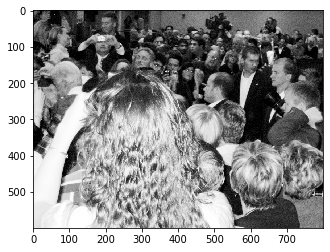

In [16]:
plt.imshow(img_final, cmap='gray')

### Compare the original and processed image

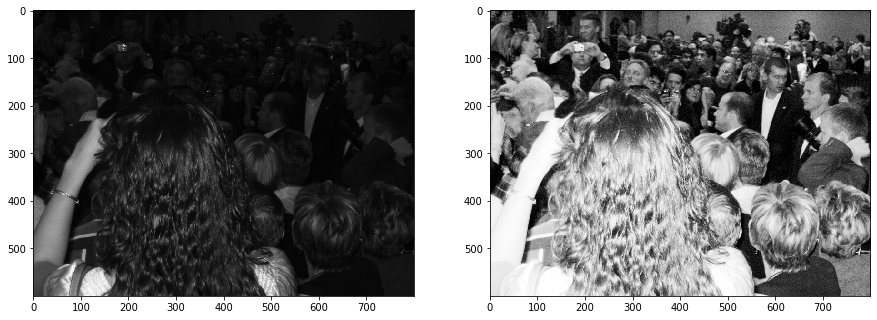

In [14]:
# Juxtapose the images
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Original image
fig.add_subplot(1,2,1)
plt.imshow(im_uint8, cmap='gray')

# Processed final image
fig.add_subplot(1,2,2)
plt.imshow(img_final, cmap='gray')

plt.show(block=True)

### Compare the histograms

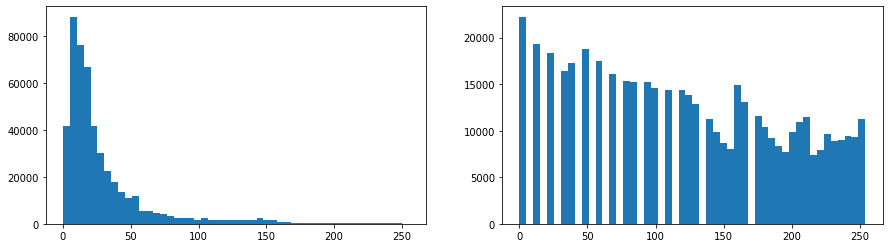

In [15]:
# Juxtapose the histograms
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

# Original histogram
fig.add_subplot(1,2,1)
plt.hist(flat_arr, bins=50)

# Processed histogram
fig.add_subplot(1,2,2)
plt.hist(img_fin, bins=50)

plt.show(block=True)

### Reapply histogram equalization over corrected image

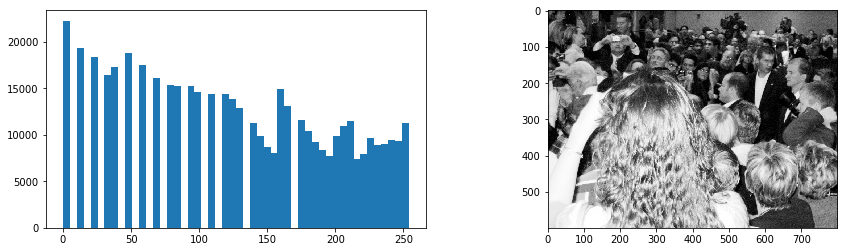

In [19]:
flat_arr = img_final.flatten()

hist = prob_df(flat_arr)

cdf = cum_df(hist)

nj = (cdf - cdf.min()) * 255 # Numerator
N = cdf.max() - cdf.min() # Denominator

# Normalized cdf values
norm_cdf = nj / N

norm_cdf = norm_cdf.astype('uint8')

# Fetch values from norm_cdf for every index in flat_arr
img_final = norm_cdf[flat_arr]
img_fin = img_final

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

# Visualize the result
fig.add_subplot(1,2,1)
plt.hist(img_final, bins=50)

# Reshape the image 
img_final = np.reshape(img_final, img_np.shape)

# Visualize the output
fig.add_subplot(1,2,2)
plt.imshow(img_final, cmap='gray')

plt.show(block=True)

### Applying histogram equalization to a test image

Min intensity = 0
Max intensity = 255


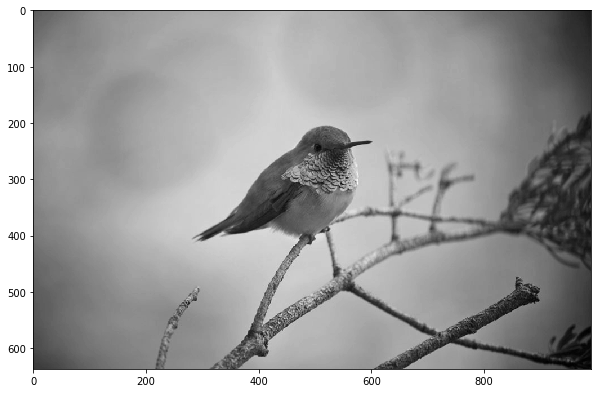

In [20]:
im_path = 'test_img.png'

# Read the image and convert to grayscale
im = io.imread(im_path)
im = rgb2gray(im)

# Convert the image to type uint8 and scale intensity values to the range 0-255
im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')

print("Min intensity = " + str(np.min(im_uint8)))
print("Max intensity = " + str(np.max(im_uint8)))

# Show the original image
fig1 = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(im_uint8)

(array([4.2600e+02, 9.6700e+02, 6.9700e+02, 1.0530e+03, 1.5340e+03,
        2.6710e+03, 4.2690e+03, 5.1120e+03, 5.8060e+03, 6.5150e+03,
        7.6090e+03, 6.6040e+03, 6.7940e+03, 7.5300e+03, 7.2110e+03,
        7.8580e+03, 8.6540e+03, 9.1780e+03, 1.1312e+04, 9.5670e+03,
        1.3495e+04, 1.0963e+04, 1.3855e+04, 1.0948e+04, 1.5096e+04,
        1.6683e+04, 2.2085e+04, 3.0344e+04, 2.5683e+04, 3.0595e+04,
        3.8536e+04, 3.2595e+04, 3.2205e+04, 3.2624e+04, 3.1835e+04,
        3.5907e+04, 2.7294e+04, 2.5315e+04, 2.2574e+04, 1.7375e+04,
        2.5163e+04, 8.0160e+03, 4.5100e+02, 1.6500e+02, 5.3000e+01,
        1.7000e+01, 1.2000e+01, 8.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

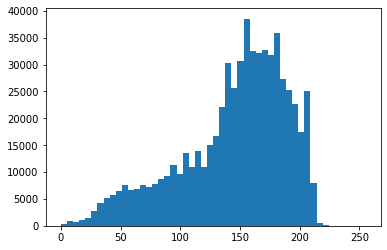

In [23]:
img_np = np.asarray(im_uint8)

flat_arr = img_np.flatten()
plt.hist(flat_arr, bins=50)

### Before Equalization

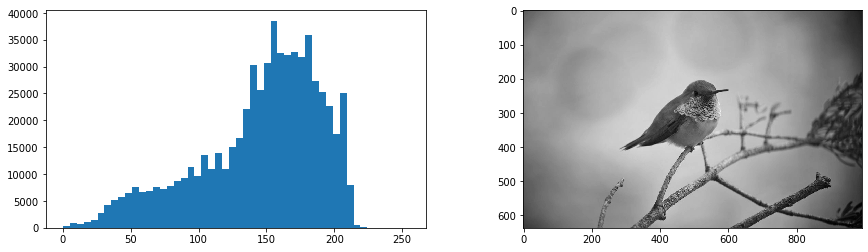

In [24]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

# Visualize the result
fig.add_subplot(1,2,1)
plt.hist(flat_arr, bins=50)

# Visualize the output
fig.add_subplot(1,2,2)
plt.imshow(im_uint8)

plt.show(block=True)

### After Histogram Equalization

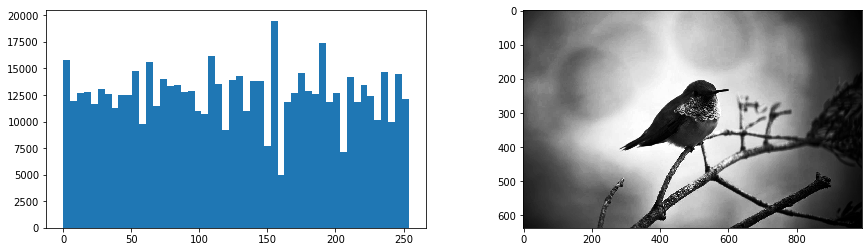

In [22]:
hist = prob_df(flat_arr)

cdf = cum_df(hist)

nj = (cdf - cdf.min()) * 255 # Numerator
N = cdf.max() - cdf.min() # Denominator

# Normalized cdf values
norm_cdf = nj / N

norm_cdf = norm_cdf.astype('uint8')

# Fetch values from norm_cdf for every index in flat_arr
img_final = norm_cdf[flat_arr]
img_fin = img_final

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

# Visualize the result
fig.add_subplot(1,2,1)
plt.hist(img_final, bins=50)

# Reshape the image 
img_final = np.reshape(img_final, img_np.shape)

# Visualize the output
fig.add_subplot(1,2,2)
plt.imshow(img_final, cmap='gray')

plt.show(block=True)